# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__L'ensemble de données comprend 6 variables sur 440 clients. Les valeurs sont quantitatives et sont les suivantes:__

- Fresh: dépenses annuelles en produits frais
- Milk: dépenses annuelles en produits laitiers
- Grocery: dépenses annuelles en produits d'épicerie
- Frozen: dépenses annuelles en produits surgelés
- Detergents_paper: dépenses annuelles en détergents et produits en papier
- Delicassen: dépenses annuelles en produits d'épicerie fine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import des données
data = pd.read_excel('MT15_exam_acp_classification.xls',index_col = 0)  # Faire colonne 0 comme index
data.head()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Client 1  12669  9656     7561     214              2674        1338
Client 2   7057  9810     9568    1762              3293        1776
Client 3   6353  8808     7684    2405              3516        7844
Client 4  13265  1196     4221    6404               507        1788
Client 5  22615  5410     7198    3915              1777        5185

In [ ]:
data


## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Afficher le graphique des individus et analyser.
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des clients qui composent chacune des classes.   

EX2 Réponses : 
1. Veuillez voir le résultat d'algo.
2.D'après la graphe, on trouve que les trois première axes représente 84% de l'information.
3. Il y a trop d'individues, je regarde aux 50 premiers. Client 41 et 23 sont proche, c'est à dire leurs données sont presque les mêmes.  Client 50 est plus loin que les autres, ce client a les données différents que les autres.
    
4.
5. variable : somme de cos2 pour chaque variable est presque 1, donc on peut dire les variables sont bien présenté par l'axe choisi.
individu : il y a des individus avec CTR petites, donc les axes que on a choisi ne peut pas bien afficher les informations de ces individues.

6. D'après le cercle: Milk,	Grocery et Detergents_Paper	sont bien présenté par Axe 1, et puis elles sont corrélés positivement. Fresh, Frozen et Delicassen sont bien présentées par Axe 2, ces trois variables sont corrélées positive.
Fresh, Frozen et Grocery et Detergents_Paper non corrélé, l'angle compris entre ces variances est preque 90°.

EX3 Réponses : 
1. On obtien 5 class si t =20.
2. Pour silouette, quand class =2, il a la valeur maximum. Donc nombre de class proposé par silouette est =2.
3, Classe 3  et 5 obtenu par CAH ont les résultat un peu différent de méthode k means. 

# Ex.1


In [4]:
#Séparation des variables quantitatives et qualitatives
x = data.values 
x


array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [5]:
# Normalisation des variables quantitatives
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) # Faire centre réduit
x   

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [6]:
# Vue statistique sur l'ensemble des matrices
data.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

# Ex.1 synthèse des données 

D'après 'describe', nous pouvons trouver la moyenne, l'écart-type et le quantile de données. 

# Ex.2 ACP

In [7]:
Z = x  #(valeur) centre réduit
Z

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [8]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation pour l'ACP
acp = PCA(svd_solver='full')  
coord = acp.fit_transform(Z)
print(acp)
print(coord)

#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)


PCA(svd_solver='full')
[[ 0.19329055 -0.30509996 -0.14087845 -0.48643154  0.49528148 -0.00741414]
 [ 0.4344199  -0.32841262  0.31900662 -0.17883036  0.36557931  0.05457185]
 [ 0.81114323  0.8150957   1.52341562 -1.25408154 -0.37905353 -0.27753858]
 ...
 [ 3.46570362 -1.03983801 -0.71316141  0.0334078  -0.53876786 -0.08534909]
 [-0.91802273 -0.03004659  0.25840805 -0.52457824 -0.09321487 -0.028943  ]
 [-1.10513709 -0.86133787  0.30515404 -0.11437678  0.10990335  0.02897846]]
6


In [9]:
coord   # coordonées d'individue

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154,  0.49528148,
        -0.00741414],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036,  0.36557931,
         0.05457185],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154, -0.37905353,
        -0.27753858],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 , -0.53876786,
        -0.08534909],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824, -0.09321487,
        -0.028943  ],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678,  0.10990335,
         0.02897846]])

In [10]:
# valeurs propres
variance = acp.explained_variance_
eigval = variance*(len(Z)-1)/len(Z) #ajustement suite à la version 0.2
print(eigval)  # valeur expliqué par deux composants

[2.64497357 1.70258397 0.74006477 0.56373023 0.28567634 0.06297111]


In [11]:
#ratio de réprésentation des valeurs prores


print (acp.explained_variance_ratio_)
print([ratio for ratio in acp.explained_variance_ratio_])


[0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]
[0.44082892881128055, 0.2837639952661693, 0.12334412896786455, 0.09395503752971497, 0.04761272400688682, 0.010495185418083766]


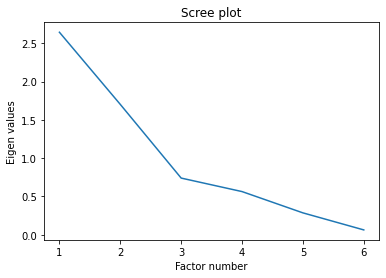

In [12]:
#scree plot
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")  #valeur propre
plt.xlabel("Factor number")
plt.show()

[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


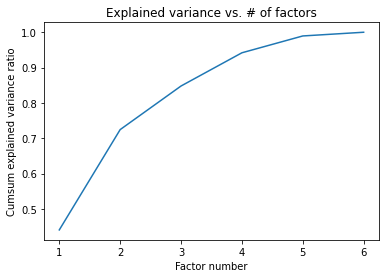

In [13]:
#cumul de variance expliquée

t = np.cumsum(acp.explained_variance_ratio_)
print(t)

plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))  # 
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

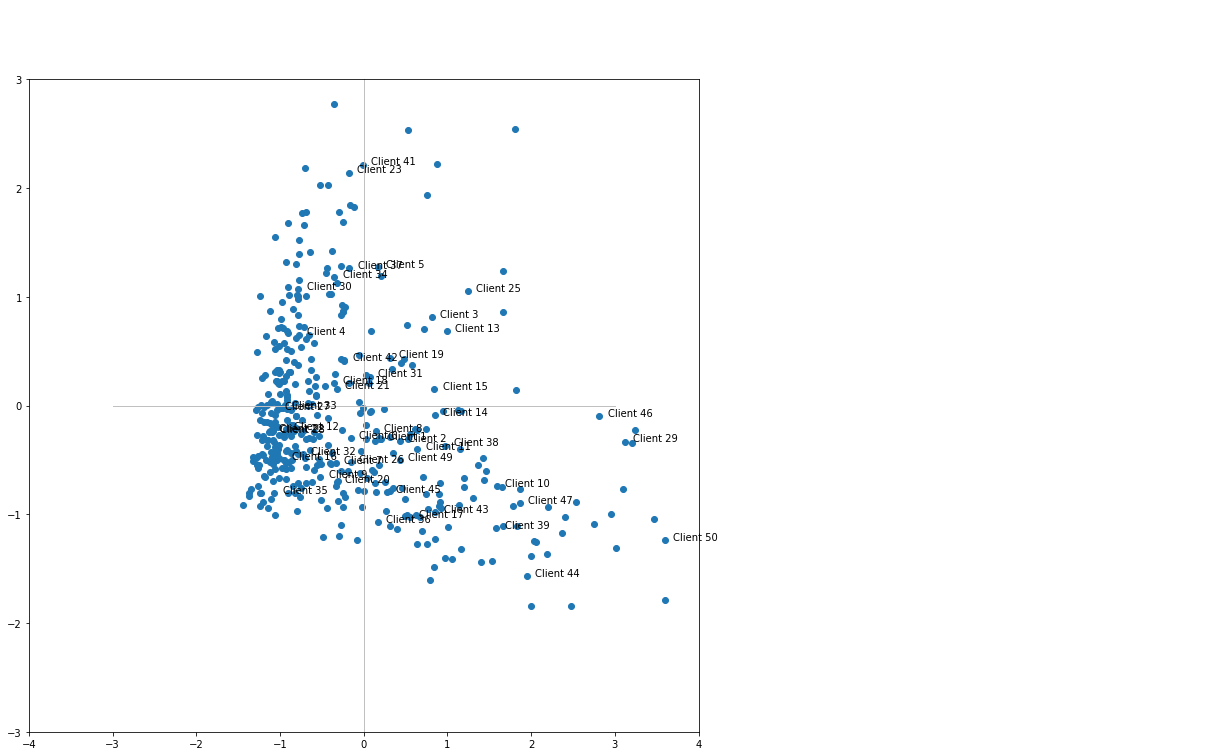

In [14]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse  
axes.set_ylim(-3,3) #et en ordonnée

# placement des points 
plt.scatter(coord[:,0],coord[:,1])     #
#placement des étiquettes des observations   
for i in range(50):
     plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-3,3],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [16]:
# Qualité d'un individè
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

             ID        d_i
0      Client 1   0.632268
1      Client 2   0.566947
2      Client 3   5.436559
3      Client 4   1.283337
4      Client 5   2.487360
..          ...        ...
435  Client 436   8.093296
436  Client 437   6.084971
437  Client 438  13.899635
438  Client 439   1.195152
439  Client 440   2.082350

[440 rows x 2 columns]


In [17]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(5):
     cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

             id    COS2_1    COS2_2
0      Client 1  0.059091  0.147225
1      Client 2  0.332872  0.190238
2      Client 3  0.121024  0.122206
3      Client 4  0.472434  0.332015
4      Client 5  0.011117  0.649903
..          ...       ...       ...
435  Client 436  0.093651  0.609412
436  Client 437  0.133861  0.462130
437  Client 438  0.864131  0.077791
438  Client 439  0.705153  0.000755
439  Client 440  0.586514  0.356281

[440 rows x 3 columns]


In [18]:
#contributions aux axes individus
ctr = coord**2
for j in range(5):
     ctr[:,j] = ctr[:,j]/(9*eigval[j])

print(pd.DataFrame({'id':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

             id     CTR_1     CTR_2
0      Client 1  0.001569  0.006075
1      Client 2  0.007928  0.007039
2      Client 3  0.027640  0.043358
3      Client 4  0.025469  0.027807
4      Client 5  0.001162  0.105496
..          ...       ...       ...
435  Client 436  0.031840  0.321874
436  Client 437  0.034218  0.183515
437  Client 438  0.504567  0.070564
438  Client 439  0.035403  0.000059
439  Client 440  0.051306  0.048417

[440 rows x 3 columns]


In [19]:
#le champ components_ de l'objet ACP
print(acp.components_)

[[ 0.04288396  0.54511832  0.57925635  0.05118859  0.5486402   0.24868198]
 [ 0.52793212  0.08316765 -0.14608818  0.61127764 -0.25523316  0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [-0.04868278  0.82657929 -0.31499943 -0.02793224 -0.33964012 -0.31470051]
 [-0.03602539 -0.03804019  0.72174458 -0.01563715 -0.68589373 -0.07513412]]


In [20]:
#racine carrée des valeurs propres     C(CP,xs)
sqrt_eigval = np.sqrt(eigval)

In [22]:
#corrélation des variables avec les axes
corvar = np.zeros((6,6))
for k in range(6):
     corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.06974378  0.68886221 -0.6987601  -0.1777082  -0.02602031 -0.00904023]
 [ 0.88654635  0.10851973  0.05194998 -0.0654639   0.44179588 -0.00954582]
 [ 0.94206631 -0.19062039 -0.09323953  0.07957747 -0.1683631   0.18111491]
 [ 0.08324992  0.79761402  0.15346028  0.57714209 -0.01492942 -0.00392399]
 [ 0.89227411 -0.33303614 -0.11716213  0.12894882 -0.18153322 -0.17211849]
 [ 0.40444082  0.65790499  0.45069909 -0.41450107 -0.16820333 -0.01885419]]


In [24]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

                 id     COR_1     COR_2
0             Fresh  0.069744  0.688862
1              Milk  0.886546  0.108520
2           Grocery  0.942066 -0.190620
3            Frozen  0.083250  0.797614
4  Detergents_Paper  0.892274 -0.333036
5        Delicassen  0.404441  0.657905


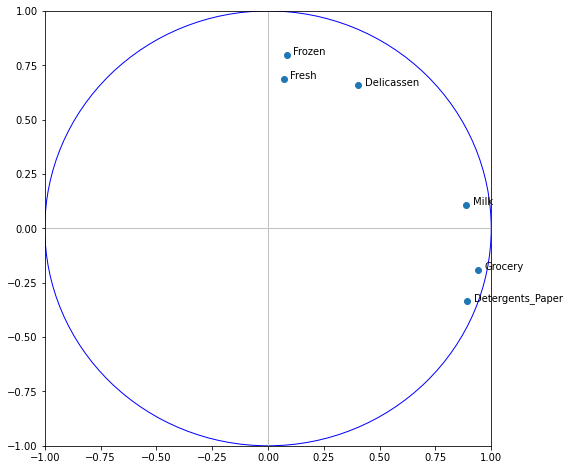

In [26]:
#cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,1])

#affichage des étiquettes (noms des variables)
for j in range(6):
     plt.annotate(data.columns[j],(corvar[j,0]+0.03,corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

In [27]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':data.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


                 id    COS2_1    COS2_2
0             Fresh  0.004864  0.474531
1              Milk  0.785964  0.011777
2           Grocery  0.887489  0.036336
3            Frozen  0.006931  0.636188
4  Detergents_Paper  0.796153  0.110913
5        Delicassen  0.163572  0.432839


In [ ]:
#cercle des corrélations pour l'axe 1 et 3
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

# les points
plt.scatter(corvar[:,0],corvar[:,2])

#affichage des étiquettes (noms des variables)
for j in range(6):
     plt.annotate(df.columns[j],(corvar[j,0]+0.03,corvar[j,2]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [28]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':data.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,2]}))

                 id    COS2_1    COS2_2
0             Fresh  0.004864  0.488266
1              Milk  0.785964  0.002699
2           Grocery  0.887489  0.008694
3            Frozen  0.006931  0.023550
4  Detergents_Paper  0.796153  0.013727
5        Delicassen  0.163572  0.203130


# Ex3


In [29]:
from pandas.plotting import scatter_matrix


In [30]:
data

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Client 1    12669   9656     7561     214              2674        1338
Client 2     7057   9810     9568    1762              3293        1776
Client 3     6353   8808     7684    2405              3516        7844
Client 4    13265   1196     4221    6404               507        1788
Client 5    22615   5410     7198    3915              1777        5185
...           ...    ...      ...     ...               ...         ...
Client 436  29703  12051    16027   13135               182        2204
Client 437  39228   1431      764    4510                93        2346
Client 438  14531  15488    30243     437             14841        1867
Client 439  10290   1981     2232    1038               168        2125
Client 440   2787   1698     2510      65               477          52

[440 rows x 6 columns]

In [31]:
# on centre et on réduit
Z


array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

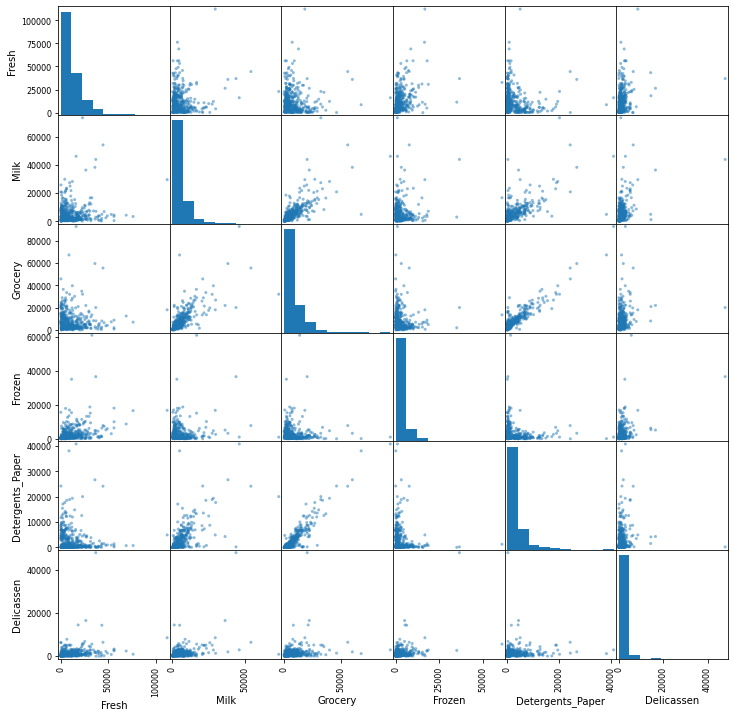

In [37]:
#graphique - croisement deux à deux des variables

scatt_mat = scatter_matrix(data,figsize=(12,12))[-1]

CAH

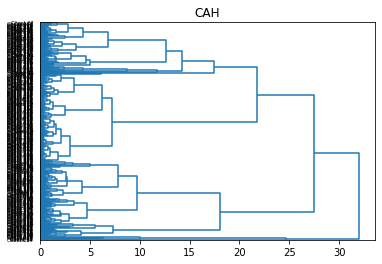

In [39]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z1 = linkage(Z,method='ward',metric='euclidean')  # méthode linkage

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z1,labels=data.index,orientation='right',color_threshold=0)
plt.show()

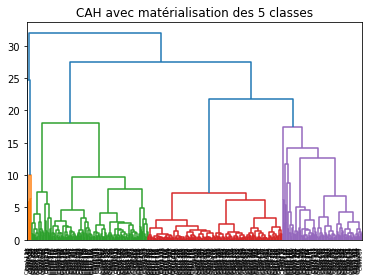

In [42]:
#matérialisation des 5 classes (hauteur t = 20)

plt.title('CAH avec matérialisation des 5 classes')
dendrogram(Z1,labels=data.index,color_threshold=20)
plt.show()

In [46]:
#découpage à la hauteur t = 20 ==> identifiants de 4 groupes obtenus

groupes_cah = fcluster(Z1,t=20,criterion='distance')
print(groupes_cah)


[3 3 3 4 5 3 3 3 4 3 3 4 5 5 5 4 3 3 5 3 5 4 5 5 3 3 4 4 3 5 5 4 5 5 4 3 5
 3 3 5 5 5 3 3 3 3 3 1 3 3 4 4 5 3 5 4 3 3 4 3 3 1 3 3 4 3 3 5 4 4 5 5 4 5
 3 4 4 3 4 4 4 3 3 4 3 1 1 5 4 5 4 5 3 5 3 4 3 4 4 4 3 3 3 5 4 4 3 3 3 3 4
 3 5 4 4 4 4 4 4 4 4 4 4 3 5 5 5 5 3 5 4 4 4 4 4 4 3 3 5 4 5 5 5 4 3 3 4 4
 4 5 4 4 4 3 4 3 3 4 3 3 3 4 4 3 3 3 3 4 4 4 3 3 3 3 4 3 5 5 3 4 5 5 3 2 4
 3 4 3 3 3 5 4 4 3 4 5 5 3 4 4 3 3 3 4 4 3 4 3 3 3 5 3 4 3 3 3 3 4 3 4 4 3
 4 4 4 4 5 4 4 4 5 3 5 4 5 4 4 4 4 5 5 5 4 5 3 3 4 4 3 4 4 3 4 5 3 5 3 4 5
 5 4 4 5 4 3 3 3 5 3 4 4 4 3 5 4 4 5 5 4 5 4 3 5 5 5 5 4 5 4 5 4 4 4 3 5 4
 4 3 3 4 5 3 3 3 3 3 3 4 4 3 5 5 3 4 4 3 4 4 4 3 4 4 4 3 5 5 4 4 5 4 4 3 5
 1 5 5 4 4 5 4 3 3 3 3 4 3 3 5 4 3 4 3 4 3 5 4 4 3 3 4 4 4 4 4 4 3 4 4 4 4
 5 5 3 5 4 4 3 5 4 3 5 5 5 4 3 4 4 4 4 4 4 4 4 5 4 4 3 4 4 4 4 5 5 5 4 4 5
 3 3 3 4 3 3 5 4 3 3 3 3 4 3 5 5 3 3 5 3 5 4 4 3 5 5 4 3 5 5 3 4 4]


In [51]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

cah = pd.DataFrame(data.index[idg],groupes_cah[idg])
cah

0
1    Client 48
1    Client 62
1    Client 86
1    Client 87
1   Client 334
..         ...
5   Client 312
5   Client 311
5   Client 177
5   Client 336
5   Client 128

[440 rows x 1 columns]

In [57]:
pd.set_option('display.max_rows', None)
cah

0
1   Client 48
1   Client 62
1   Client 86
1   Client 87
1  Client 334
2  Client 184
3  Client 110
3  Client 145
3  Client 146
3  Client 320
3  Client 316
3  Client 154
3  Client 103
3  Client 156
3  Client 324
3  Client 157
3  Client 159
3  Client 160
3  Client 161
3  Client 310
3  Client 164
3  Client 165
3  Client 166
3  Client 167
3  Client 313
3  Client 109
3  Client 138
3  Client 332
3  Client 359
3  Client 112
3  Client 108
3  Client 107
3  Client 358
3  Client 354
3  Client 352
3  Client 350
3  Client 137
3  Client 246
3  Client 346
3  Client 124
3  Client 344
3  Client 343
3  Client 342
3  Client 129
3  Client 341
3  Client 307
3  Client 347
3  Client 306
3    Client 1
3  Client 171
3  Client 208
3  Client 209
3  Client 210
3  Client 212
3  Client 273
3  Client 214
3  Client 215
3  Client 216
3  Client 217
3  Client 206
3  Client 219
3  Client 269
3  Client 267
3  Client 266
3  Client 265
3  Client 257
3  Client 232
3  Client 255
3  Client 252
3  Client 249
3  Client 222
3  Client 102
3  Client 203
3  Client 201
3  Client 172
3  Client 173
3  Client 174
3  Client 305
3  Client 176
3  Client 304
3  Client 303
3  Client 179
3  Client 302
3  Client 202
3  Client 299
3  Client 298
3  Client 186
3  Client 188
3  Client 189
3  Client 190
3  Client 294
3  Client 194
3  Client 198
3  Client 282
3  Client 183
3  Client 101
3  Client 245
3   Client 49
3   Client 60
3   Client 61
3   Client 26
3   Client 63
3   Client 25
3   Client 64
3  Client 418
3  Client 419
3   Client 66
3   Client 67
3  Client 421
3  Client 410
3  Client 424
3   Client 18
3   Client 17
3   Client 58
3   Client 57
3  Client 417
3  Client 397
3  Client 409
3   Client 36
3  Client 408
3  Client 413
3   Client 38
3   Client 39
3   Client 29
3  Client 425
3   Client 43
3   Client 45
3   Client 46
3   Client 47
3   Client 97
3   Client 50
3  Client 416
3   Client 54
3   Client 44
3  Client 427
3   Client 20
3  Client 412
3    Client 6
3  Client 373
3  Client 435
3  Client 438
3   Client 93
3   Client 83
3    Client 3
3    Client 7
3   Client 82
3  Client 377
3    Client 8
3  Client 380
3   Client 78
3   Client 11
3  Client 431
3  Client 366
3   Client 95
3   Client 10
3    Client 2
3   Client 85
3  Client 385
3   Client 75
4  Client 250
4  Client 415
4  Client 253
4  Client 296
4  Client 248
4  Client 293
4  Client 247
4  Client 251
4  Client 430
4  Client 291
4  Client 272
4  Client 275
4  Client 271
4  Client 270
4  Client 276
4  Client 420
4  Client 279
4  Client 281
4  Client 434
4  Client 287
4  Client 264
4  Client 429
4  Client 261
4  Client 289
4  Client 258
4  Client 292
4  Client 262
4  Client 365
4  Client 411
4  Client 388
4  Client 337
4  Client 338
4  Client 340
4  Client 387
4  Client 386
4  Client 384
4  Client 345
4  Client 379
4  Client 351
4  Client 353
4  Client 389
4  Client 376
4  Client 357
4  Client 375
4  Client 370
4  Client 369
4  Client 368
4  Client 360
4  Client 361
4  Client 362
4  Client 367
4  Client 363
4  Client 364
4  Client 356
4  Client 297
4  Client 331
4  Client 391
4  Client 300
4  Client 406
4  Client 405
4  Client 401
4  Client 308
4  Client 400
4  Client 399
4  Client 398
4  Client 309
4  Client 396
4  Client 395
4  Client 390
4  Client 314
4  Client 317
4  Client 318
4  Client 319
4  Client 393
4  Client 321
4  Client 322
4  Client 323
4  Client 392
4  Client 327
4  Client 328
4  Client 330
4  Client 315
4  Client 349
4  Client 220
4  Client 440
4  Client 133
4   Client 65
4  Client 134
4   Client 59
4  Client 135
4  Client 136
4   Client 56
4  Client 140
4   Client 52
4   Client 51
4  Client 144
4  Client 132
4  Client 147
4  Client 149
4  Client 151
4  Client 152
4  Client 153
4  Client 155
4  Client 158
4   Client 81
4  Client 163
4  Client 168
4  Client 169
4  Client 170
4  Client 148
4  Client 131
4   Client 69
4  Client 243
4   Client 89
4   Client 80
4   Client 79
4   Client 91
4   Client 96
4   Client 98
4   Client 99
4  Client 100
4   Client 77
4  Client 105
4  Client 106
4  Client 111
4   Client 76
4  Clien

# kmeans

In [58]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)  # on choisit 4 avec l'étude du dessus
kmeans.fit(Z)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))



[2 0 0 2 1 2 2 2 2 0 0 2 1 0 0 2 0 2 2 2 2 2 1 3 0 2 2 2 0 1 2 2 2 1 2 0 1
 0 0 1 1 2 0 0 0 0 0 3 0 0 2 2 1 0 2 2 3 0 2 2 2 3 2 0 2 3 2 0 2 2 1 1 2 1
 2 2 2 0 2 2 2 0 0 2 2 3 3 1 2 1 2 2 3 1 0 2 2 2 2 2 0 0 2 1 2 2 0 0 2 0 2
 0 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 0 2 2
 2 1 2 2 2 2 2 0 0 2 0 0 0 2 2 0 2 0 0 2 2 2 0 0 2 0 2 0 1 2 2 2 2 1 0 4 2
 2 2 2 0 0 2 2 2 0 2 1 1 0 2 2 0 0 1 2 2 0 2 2 2 0 2 3 2 2 0 0 0 2 0 2 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 0 0 2 2 2 2 2 3 2 1 0 1 2 2 1
 1 2 2 2 2 0 0 0 2 0 2 2 2 2 1 2 2 1 1 2 2 2 2 1 1 1 1 2 2 2 1 2 2 2 0 2 2
 2 2 2 2 2 0 0 0 0 0 0 2 2 0 2 1 0 2 2 0 2 2 2 0 2 2 2 2 2 1 2 2 2 2 2 0 2
 3 1 1 2 2 2 2 0 0 2 0 2 2 0 1 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 0 1 2 2 1 1 1 2 0 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 1 2 2 2 2 1
 0 2 2 2 2 2 1 2 2 0 2 0 2 0 2 2 2 2 1 0 1 2 2 2 1 2 2 2 1 1 0 2 2]
            0
0   Client 82
0  Client 304
0  Client 303
0  Client 302
0  Client 171
0  Client 112
0  Client

In [59]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1    2  3  4
row_0                   
1       0   0    0  5  0
2       0   0    0  0  1
3      93   1   54  5  0
4       0   0  177  0  0
5       3  62   38  1  0

# Silouette


[0.54721469 0.33391714 0.34847139 0.37625525 0.32342537 0.30211554
 0.35519136 0.33152747 0.29503897 0.27462459 0.28849019 0.22897207
 0.22169188 0.27662982 0.26819335]


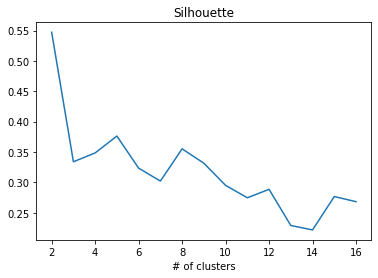

In [60]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(Z)
    res[k] = metrics.silhouette_score(Z,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()